In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table, hstack
import astropy.units as u

In [2]:
import sys
sys.path.append('/home/jiaxuanl/Research/Packages/carpenter/carpenter-main/src')
# Add the Carpenter to PATH
from carpenter.cutout import generate_cutout

In [3]:
import lsst.daf.butler as dafButler
butler = dafButler.Butler('/projects/MERIAN/repo/', collections='DECam/runs/merian/dr1_wide')

In [15]:
ra = 149.65967981967491
dec = 2.640111627283772

img, psf, _ = generate_cutout(butler, 'hsc_rings_v1', 
                              ra, dec, 
                              half_size=30 * u.arcsec,
                              band='N708', 
                              data_type='deepCoadd_calexp',
                              psf=True)

### Display the cutout

In [16]:
import lsst.geom as geom
import lsst.afw.display as afwDisplay

In [17]:
# display.getMaskPlaneColor()

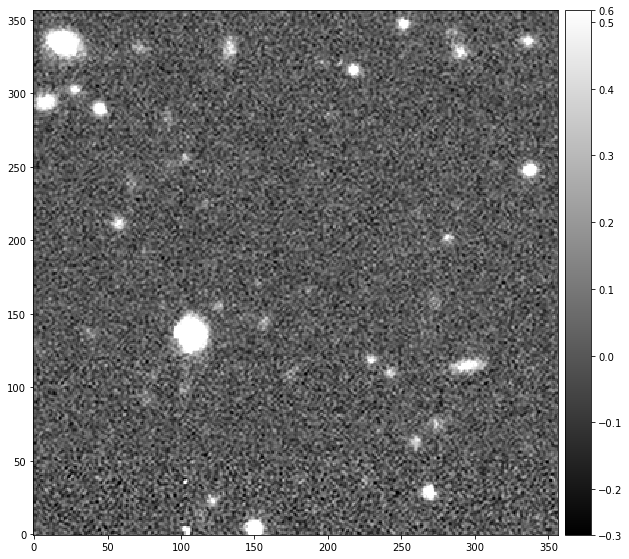

In [18]:
afwDisplay.setDefaultBackend('matplotlib')
fig, ax = plt.subplots(figsize=(10, 10))
display = afwDisplay.Display(frame=fig)
display.scale("linear", "zscale")
display.setMaskTransparency(100) # if you want mask, make the transparency to 80

# for key in display.getMaskPlaneColor().keys():
#     display.setMaskPlaneColor(key, 'IGNORE')
# display.setMaskPlaneColor('NO_DATA', 'cyan')
# display.setMaskPlaneColor('DETECTED', 'blue')

display.mtv(img)

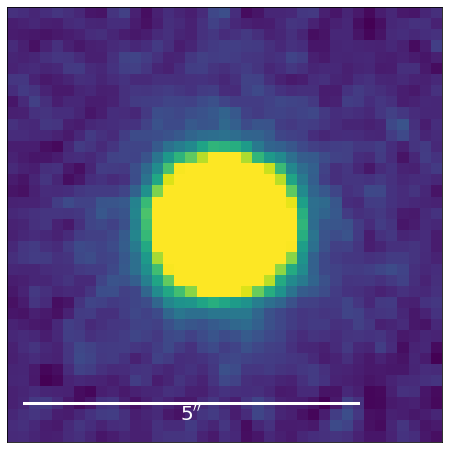

In [33]:
display_single(psf.array); # PSF model